# Lab1. Experimental time complexity analysis
Alexandra Matveeva, J4134c

In [74]:
import numpy as np
import numpy.random as rand
import decimal
import time
import matplotlib.pyplot as plt

In [41]:
#constant function
def const_function(v):
    return 1

In [3]:
#the sum of elements
def sum_function(v):
    sum = 0
    for i in range(0, len(v)):
        sum += v[i]
    return sum

In [56]:
#the product of elements
def prod_function(v):
    decimal.getcontext().prec = 100 #to avoid overflow
    prod = 1
    for i in range(0, len(v)):
        prod *= decimal.Decimal(v[i])
    return prod

In [104]:
#direct calculation P(x)
def poly_direct_function(v, x):
    decimal.getcontext().prec = 100 #to avoid overflow
    res = 0
    for i in range(len(v)):
        res += decimal.Decimal(v[i]) * (decimal.Decimal(x) ** i)
    return res

In [110]:
#Horner's calculation P(x)
def poly_horner_function(v, x):
    res = v[len(v)-1]
    for i in range(len(v)-2, -1, -1):
        res = decimal.Decimal(res) * decimal.Decimal(x) + decimal.Decimal(v[i])
    return res

In [7]:
#Bubble sort
def bubble_sort_function(v):
    for i in range(len(v)):
        for j in range(0, len(v)-i-1):
            if v[j] > v[j+1]:
                v[j], v[j+1] = v[j+1], v[j]
    return v

In [81]:
#Quick sort Реализовать самостоятельно
def quick_sort_function(v):
    return np.sort(v, kind='quicksort')

In [17]:
#Timsort

#binary search
def binary_search_func(v, item, start, end):
    if start == end:
        if v[start] > item:
            return start
        else:
            return start + 1
    if start > end:
        return start

    mid = int((start + end)/ 2)
    if v[mid] < item:
        return binary_search_func(v, item, mid + 1, end)
    elif v[mid] > item:
        return binary_search_func(v, item, start, mid - 1)
    else:
        return mid



# Insertion sort that the heap sort uses if the array size is small or if
# the size of the "run" is small

def insertion_sort_func(v):
    l = len(v)
    for index in range(1, l):
        value = v[index]
        pos = binary_search_func(v, value, 0, index - 1)
        v = v[:pos] + [value] + v[pos:index] + the_array[index+1:]
    return v

def merge_func(left, right):
#     Takes two sorted lists and returns a single sorted list by comparing the
#     elements one at a time.
    
    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

#main timsort function
def timsort_func(v):
    runs, sorted_runs = [], []
    l = len(v)
    new_run = [v[0]]
    for i in range(1, l):
        if i == l-1:
            new_run.append(v[i])
            runs.append(new_run)
            break
        if v[i] < v[i-1]:
            if not new_run:
                runs.append([v[i-1]])
                new_run.append(v[i])
            else:
                runs.append(new_run)
                new_run = []
        else:
            new_run.append(v[i])
    for each in runs:
        sorted_runs.append(insertion_sort_func(each))
    sorted_vector = []
    for run in sorted_runs:
        sorted_vector = merge_func(sorted_vector, run)
    return sorted_vector

In [88]:
# matrix product

def matrix_prod_function(A, B):
    return np.matmul(A, B)   

In [52]:
# function for data representation 

def lineplot(x_data, y_data, x_label, y_label, title):
    # Create the plot object
    _, ax = plt.subplots()
    
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

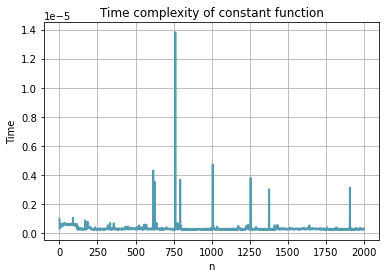

In [98]:
# Time complexity estimation for constant function
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        const_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(2000)], avg_times, 'n', 'Time', 'Time complexity of constant function')

[]

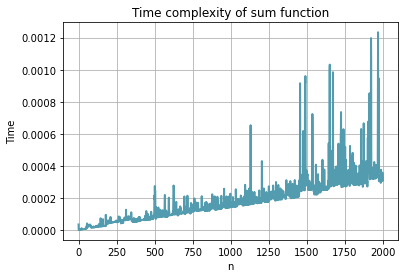

In [99]:
# Time complexity estimation for sum function
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        sum_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(2000)], avg_times, 'n', 'Time', 'Time complexity of sum function')
plt.plot()

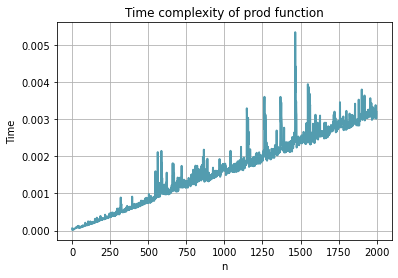

In [100]:
# Time complexity estimation for product function
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        prod_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(2000)], avg_times, 'n', 'Time', 'Time complexity of prod function')

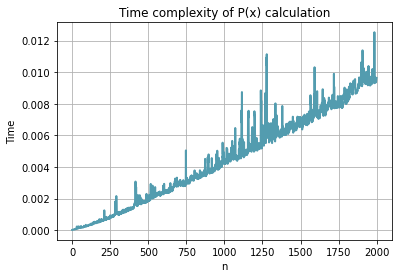

In [105]:
# Time complexity estimation for direct P(x) calculation
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        poly_direct_function(vector, x=1.5)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(2000)], avg_times, 'n', 'Time', 'Time complexity of P(x) calculation')

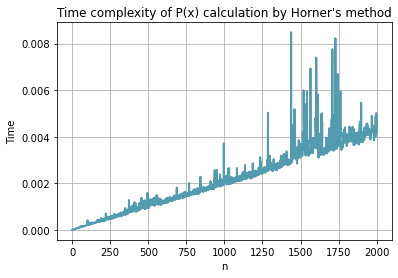

In [111]:
# Time complexity estimation for P(x) calculation by Horner's method
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        poly_horner_function(vector, x=1.5)
        
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(2000)], avg_times, 'n', 'Time', "Time complexity of P(x) calculation by Horner's method")

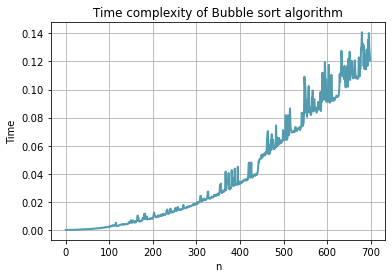

In [112]:
# Time complexity estimation of Bubble sort algorithm
avg_times = []
for n in range(1, 701):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        bubble_sort_function(vector)
        
        # end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(700)], avg_times, 'n', 'Time', 'Time complexity of Bubble sort algorithm')

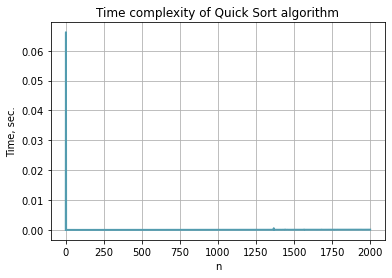

In [80]:
# Time complexity estimation of Quick sort algorithm
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        quick_sort_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(2000)], avg_times, 'n', 'Time', 'Time complexity of Quick Sort algorithm')

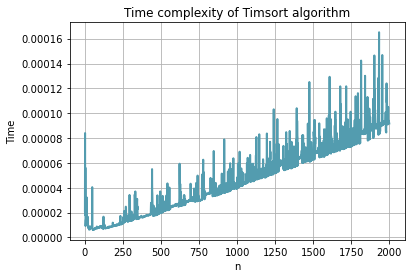

In [117]:
# Time complexity estimation of Timsort algorithm
avg_times = []
for n in range(1, 2001):
    t = []
    for i in range(5):
        #vector initialization
        vector = np.random.uniform(low=0, high=100, size=n)
        
        #start time
        start_t = time.perf_counter()
        
        timsort_function(vector)
        
        #end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
        
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(2000)], avg_times, 'n', 'Time', 'Time complexity of Timsort algorithm')

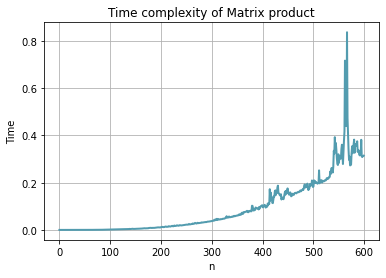

In [96]:
# Matrix product

n = 600

matrix_prod_function(A_matrix, B_matrix)
# matrix generation
avg_times = []
for n in range(1, n+1):
    t = []
    for i in range(5):
        # matrix generation
        A_matrix = np.random.randint(100, size=(n, n))
        B_matrix = np.random.randint(100, size=(n, n))
        
        # start time
        start_t = time.perf_counter()
        
        matrix_prod_function(A_matrix, B_matrix)
        
        # end_time
        end_t = time.perf_counter()
        
        t.append(end_t-start_t)
    
    avg_times.append(np.mean(t))
    
lineplot([n for n in range(600)], avg_times, 'n', 'Time', 'Time complexity of Matrix product')